In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from pyforest import *
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv('C:/Users/sanas/Downloads/SLC_Final_Exam/heart1.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute Information:
This data set contains 165 heart patient records and 138 healthy patient records. The "goal" field refers to the presence of heart disease in the patient.
Attribute Information:
> 1. Age: age in years
> 2. Sex: (1:male, 0: female)
> 3. chest pain type (4 values)
> 4. resting blood pressure (in mm Hg on admission to the hospital)
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina (1: yes , 0 : no)
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
> Selector field used to split the data into two sets (labeled by the experts): Selector is a class label used to divide into groups(heart patient or not).


In [3]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null object
target      303 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 33.2+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

Some pointers which would help you, but don’t be limited by these
a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)
b.	Calculate five-point summary for numerical variables
c.	Summarize observations for categorical variables – no. of categories, % observations in each category


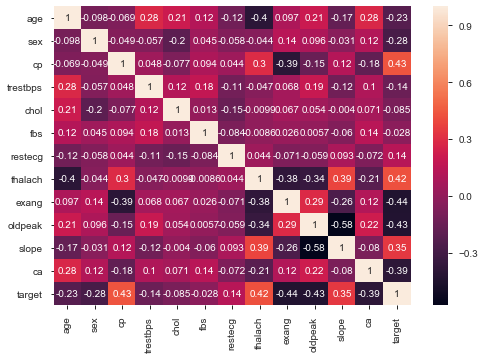

In [9]:
figsize=
sns.heatmap(df.corr(),annot=True)

In [10]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


From abovewe can say that more than half of the population suffering from Heart Disease with parcentage of 54.5%.

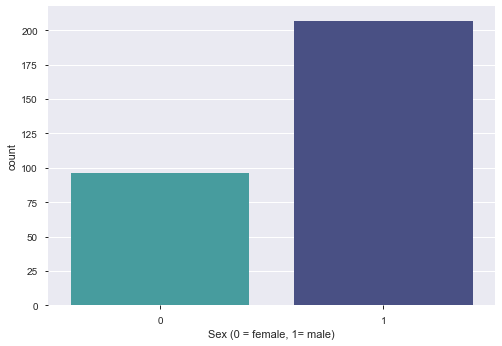

In [11]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

**Number of Women suffering from Heart Disease are more than Men** but **Men population is more than Women**. We will use these insight for our model developement.

In [12]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [13]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
target,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636


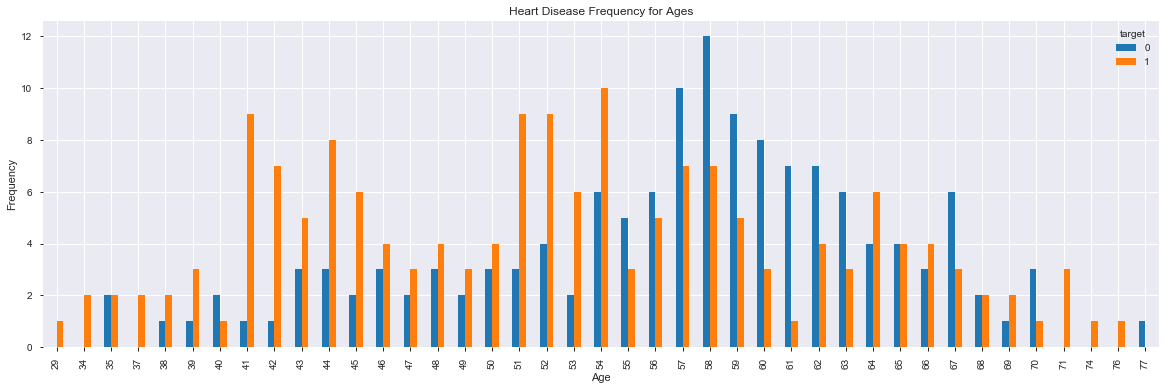

In [14]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

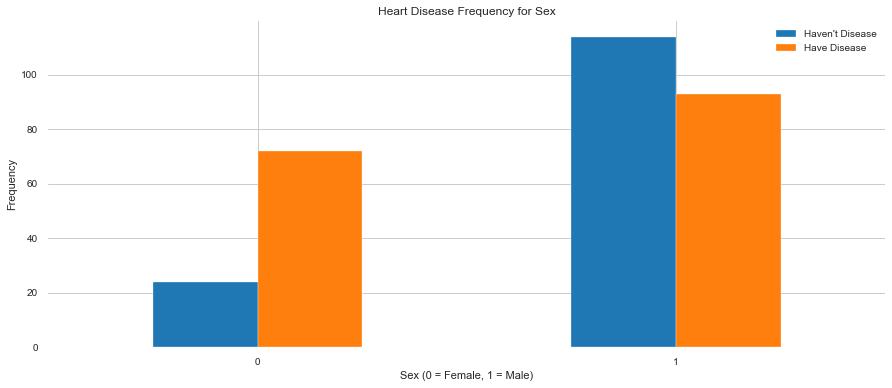

In [200]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

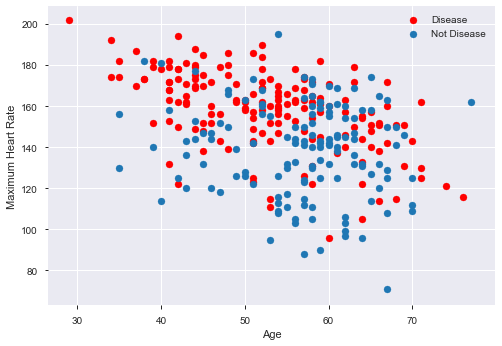

In [16]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [100]:
#no correlation seen

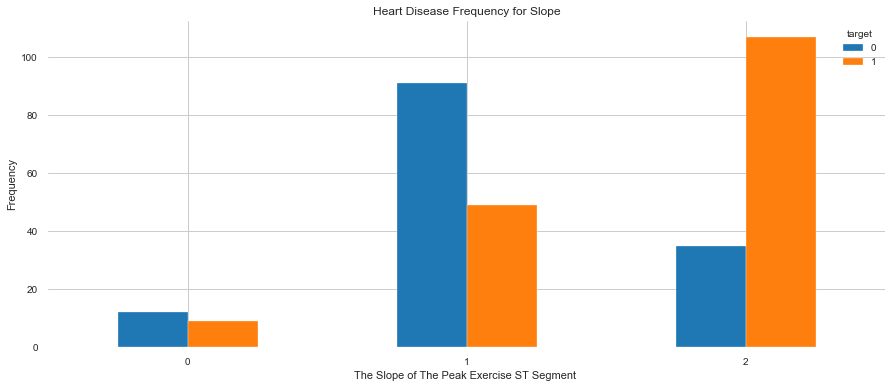

In [201]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

 **People having up sloping are more prone to Heart Disease than flat and downsloping**.

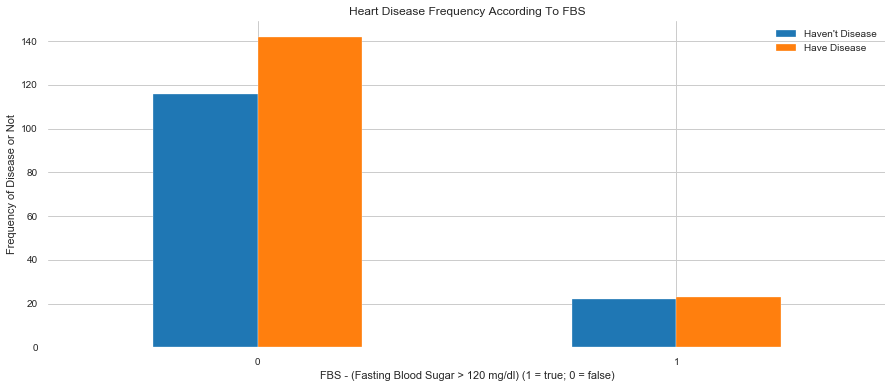

In [202]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Text(0.5, 1.0, 'resting electrocardiographic')

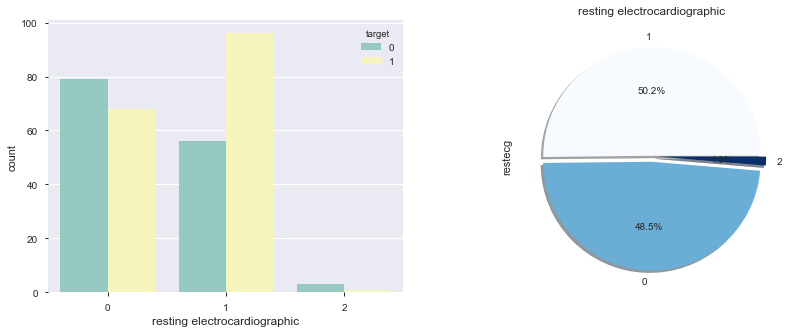

In [99]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='restecg',data=df,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("resting electrocardiographic",size=12)
df.restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("resting electrocardiographic",size=12)

**if resting electrocardiographic is 1 then person have more chances of suffering from Heart Disease**

 **People having fps < 120 have more chance of having Heart Disease than people havnig fps >120**

Some pointers which would help you, but don’t be limited by these
a.	Do variables have missing/null values?
b.	Do variables have outliers? 
c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


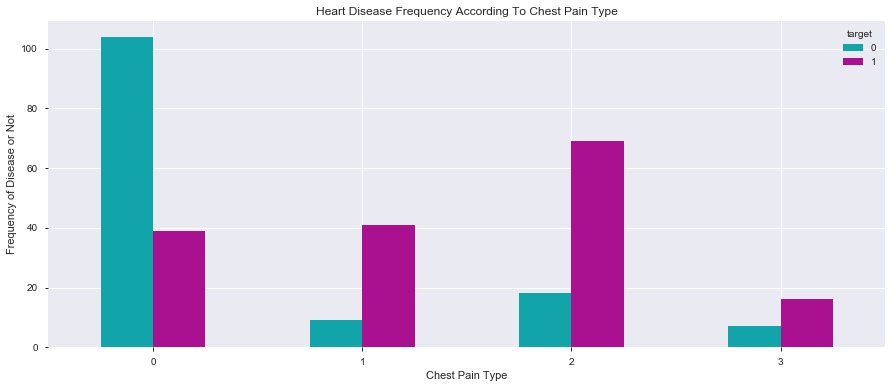

In [19]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

**People who are on 3rd level of chest pain are very less as compared to people who are on 2nd level of chest pain**. 
I guess **Most people died after 2nd level of chest pain**

Some pointers which would help you, but don’t be limited by these
a.	Do variables have missing/null values?
b.	Do variables have outliers? 
c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#no null values

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


In [22]:
# her also no vull values visible

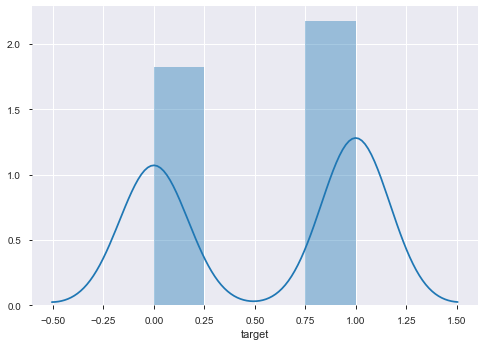

In [23]:
sns.distplot(df['target'])

In [ ]:
#target does look normal

In [25]:
from scipy.stats import shapiro,levene,mannwhitneyu

In [26]:
shapiro(df.target)

(0.6335940361022949, 5.667309370347439e-25)

If your p-value is less than your selected alpha level (typically 0.05), you reject the null hypothesis in favor of the alternative hypothesis. If the p-value is above your alpha value, you fail to reject the null hypothesis.
null hypothesis is not normal which we will reject...target column is normal

In [27]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.(later)

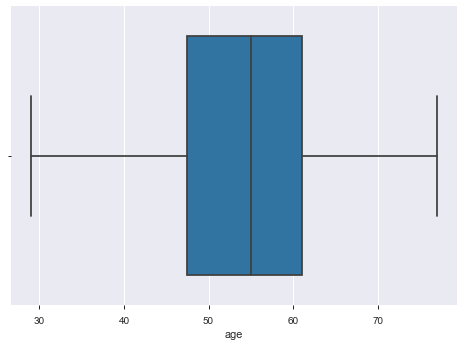

In [28]:
sns.boxplot(df['age'])

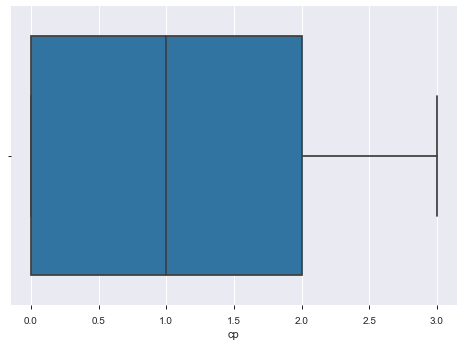

In [31]:
sns.boxplot(df['cp'])

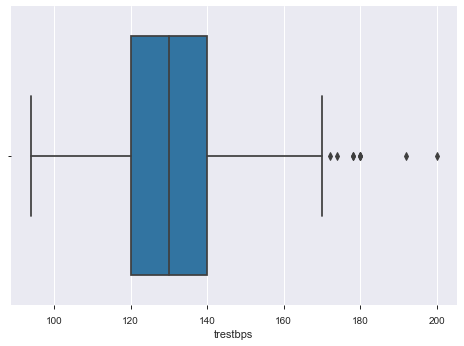

In [32]:
sns.boxplot(df['trestbps'])

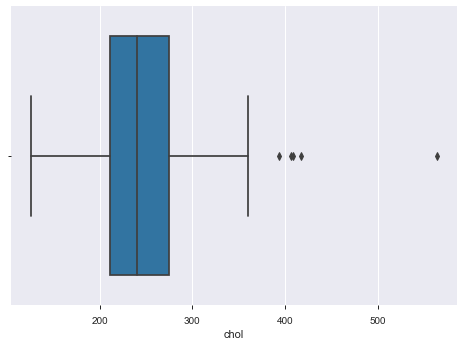

In [33]:
sns.boxplot(df['chol'])

In [46]:
df.chol.value_counts()

234    6
204    6
197    6
269    5
212    5
254    5
226    4
243    4
240    4
239    4
233    4
177    4
282    4
211    4
219    3
230    3
283    3
263    3
245    3
288    3
199    3
258    3
256    3
236    3
246    3
231    3
220    3
303    3
229    3
274    3
      ..
326    1
340    1
215    1
341    1
342    1
353    1
354    1
360    1
394    1
407    1
306    1
305    1
300    1
293    1
217    1
224    1
237    1
241    1
242    1
409    1
252    1
257    1
259    1
262    1
276    1
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

In [ ]:
df.shape

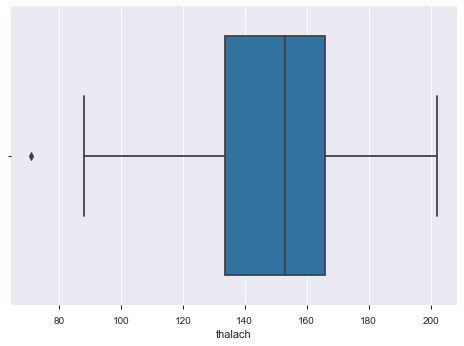

In [38]:
sns.boxplot(df['thalach'])

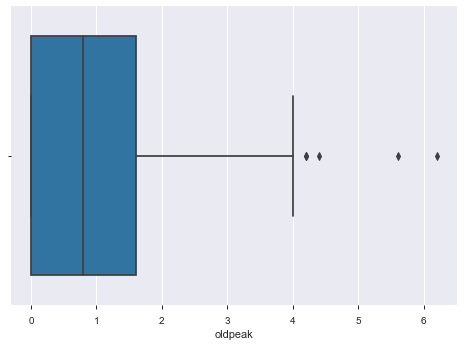

In [40]:
sns.boxplot(df['oldpeak'])

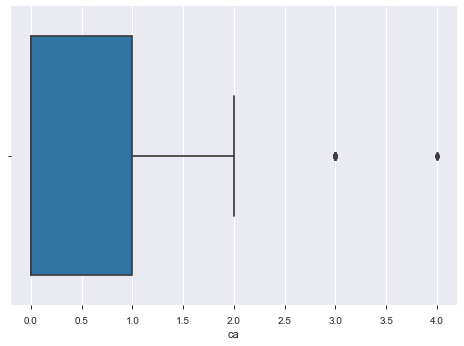

In [42]:
sns.boxplot(df['ca'])

from above boxplots we can see outliers however i would like to keep them 

Summarize relationships among variables (10 marks)               
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?
b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

 Hint: based on your observations you may want to transform features or create additional features.


In [47]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

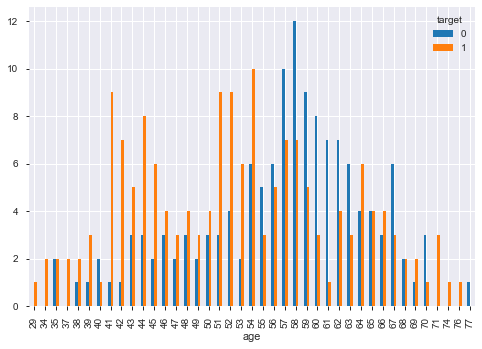

In [54]:
pd.crosstab(df['age'],df['target']).plot(kind='bar')

#some statistical test we will perform to see which column affects target

In [56]:
from scipy import stats
import numpy       as np
import pandas      as pd
import scipy.stats as st
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt

mi=df[df['target']==0]['age']
fi=df[df['target']==1]['age']
stats.mannwhitneyu(mi,fi)

MannwhitneyuResult(statistic=8240.5, pvalue=1.7192551591614436e-05)

In [57]:
#as p value is less than 0.05 we reject null hypo , or age has effect on target

In [60]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [59]:
#does sex have an effect on target?
mi=df[df['target']==0]['sex']
fi=df[df['target']==1]['sex']
stats.mannwhitneyu(mi,fi)  

MannwhitneyuResult(statistic=8397.0, pvalue=5.268364336491165e-07)

In [ ]:
#as p value is less than 0.05 we reject null hypo , or sex has effect on target

In [63]:
mi=df[df['target']==0]['trestbps']
fi=df[df['target']==1]['trestbps']
stats.mannwhitneyu(mi,fi)  

MannwhitneyuResult(statistic=9784.5, pvalue=0.01732622263010252)

In [ ]:
#as p value is less than 0.05 we reject null hypo , or trestbps has effect on target

In [76]:
mi=df[df['target']==0]['chol']
fi=df[df['target']==1]['chol']
stats.mannwhitneyu(mi,fi)  

MannwhitneyuResult(statistic=9789.5, pvalue=0.01785759100568821)

In [ ]:
#as p value is less than 0.05 we reject null hypo , or chol has effect on target

In [84]:
mi=df[df['target']==0]['thalach']
fi=df[df['target']==1]['thalach']
stats.mannwhitneyu(mi,fi)  

MannwhitneyuResult(statistic=5732.0, pvalue=4.898277528257624e-14)

In [ ]:
#as p value is less than 0.05 we reject null hypo , or thalach has effect on target

In [88]:
mi=df[df['target']==0]['oldpeak']
fi=df[df['target']==1]['oldpeak']
stats.mannwhitneyu(mi,fi)  

MannwhitneyuResult(statistic=5922.0, pvalue=1.20348934434718e-13)

In [ ]:
#as p value is less than 0.05 we reject null hypo , or oldpeak has effect on target

In [79]:
table=pd.crosstab(index=df['target'],columns=df['restecg'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  

(10.023091785081,
 0.006660598773498031,
 2,
 array([[66.95049505, 69.22772277,  1.82178218],
        [80.04950495, 82.77227723,  2.17821782]]))

In [ ]:
#as p value is less than 0.05 we reject null hypo , or trestbps has effect on target

In [78]:
table=pd.crosstab(index=df['target'],columns=df['fbs'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  

(0.10627276301947715, 0.7444281114149577, 1, array([[117.5049505,  20.4950495],
        [140.4950495,  24.5049505]]))

In [ ]:
#as p value is more than 0.05 we accpt null hypo , or no effect on target

In [82]:
table=pd.crosstab(index=df['target'],columns=df['restecg'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  

(10.023091785081,
 0.006660598773498031,
 2,
 array([[66.95049505, 69.22772277,  1.82178218],
        [80.04950495, 82.77227723,  2.17821782]]))

In [ ]:
#as p value is less than 0.05 we reject null hypo , or restecg has effect on target

In [86]:
table=pd.crosstab(index=df['target'],columns=df['exang'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  

(55.94454996665093,
 7.454409331235655e-14,
 1,
 array([[ 92.91089109,  45.08910891],
        [111.08910891,  53.91089109]]))

In [ ]:
#as p value is less than 0.05 we reject null hypo , or exang has effect on target

In [90]:
table=pd.crosstab(index=df['target'],columns=df['slope'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  

(47.50689675603025,
 4.8306819342768186e-11,
 2,
 array([[ 9.56435644, 63.76237624, 64.67326733],
        [11.43564356, 76.23762376, 77.32673267]]))

In [ ]:
#as p value is less than 0.05 we reject null hypo , or slope has effect on target

In [94]:
table=pd.crosstab(index=df['target'],columns=df['ca'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  

(74.36663061195098,
 2.7124702119593116e-15,
 4,
 array([[79.7029703 , 29.6039604 , 17.30693069,  9.10891089,  2.27722772],
        [95.2970297 , 35.3960396 , 20.69306931, 10.89108911,  2.72277228]]))

In [ ]:
#as p value is less than 0.05 we reject null hypo , or ca has effect on target

In [93]:
table=pd.crosstab(index=df['target'],columns=df['thal'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  

(90.1337219890268,
 1.23338758819237e-18,
 4,
 array([[ 2.27722772,  0.91089109,  7.74257426, 74.23762376, 52.83168317],
        [ 2.72277228,  1.08910891,  9.25742574, 88.76237624, 63.16831683]]))

In [ ]:
#as p value is less than 0.05 we reject null hypo , or thal has effect on target

In [68]:
table=pd.crosstab(index=df['target'],columns=df['cp'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  

(81.68642755194445,
 1.3343043373050064e-17,
 3,
 array([[65.12871287, 22.77227723, 39.62376238, 10.47524752],
        [77.87128713, 27.22772277, 47.37623762, 12.52475248]]))

In [ ]:
#as p value is less than 0.05 we reject null hypo , or cp has effect on target

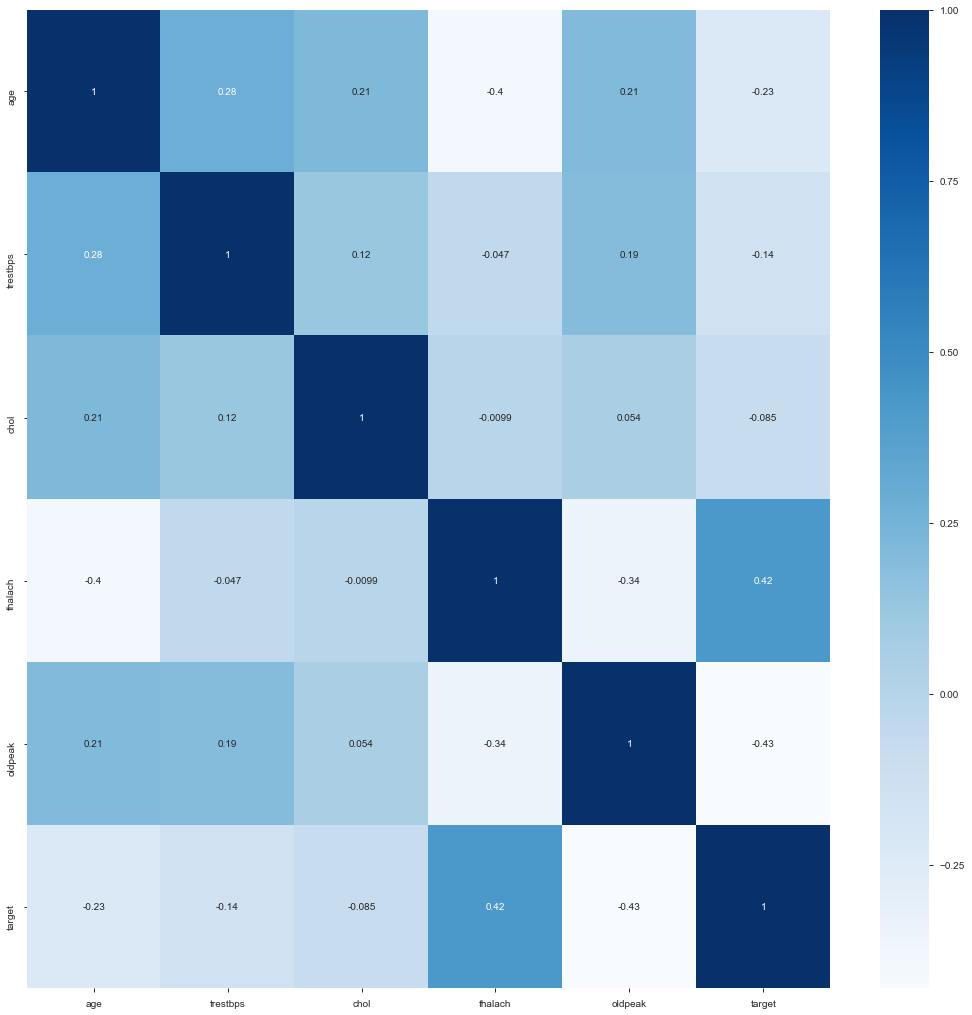

In [102]:
fig=plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot= True, cmap='Blues')

In [103]:
#high correlation in between features

In [75]:
df.thal.replace(to_replace=['?',0],value=[0,0],inplace=True) #removing ? and putting it as category 0

In [97]:
df.sex=df.sex.astype('category')
df.cp=df.cp.astype('category')
df.fbs=df.fbs.astype('category')
df.restecg=df.restecg.astype('category')
df.exang=df.exang.astype('category')
df.ca=df.ca.astype('category')
df.slope=df.slope.astype('category')
df.thal=df.thal.astype('category')# converting data type

In [105]:
df.thal.value_counts()

2    163
3    116
1     17
0      5
0      2
Name: thal, dtype: int64

In [106]:
data=pd.get_dummies(df,drop_first=True)
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [107]:
data.shape

(303, 24)

In [123]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled=MinMaxScaler().fit_transform(data)
data_scaled=pd.DataFrame(data=data_scaled, columns=data.columns)

In [124]:
x=data_scaled.drop('target',axis=1)
y=data_scaled['target']

In [125]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size=0.20,
                                             random_state=10)

In [113]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [115]:
def CrossVal(dataX,dataY,mode,cv=5):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

In [116]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

Accuracy is :  0.8138207410623824


Text(0.5, 1, 'F1 Score = 0.8070175438596492')

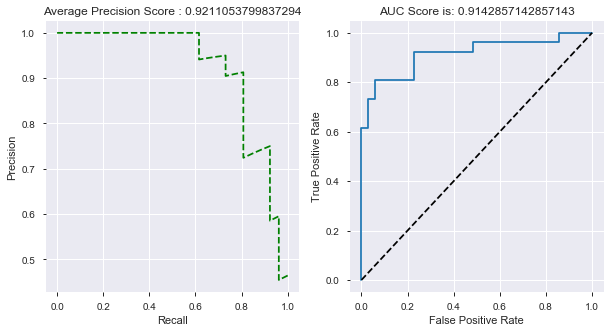

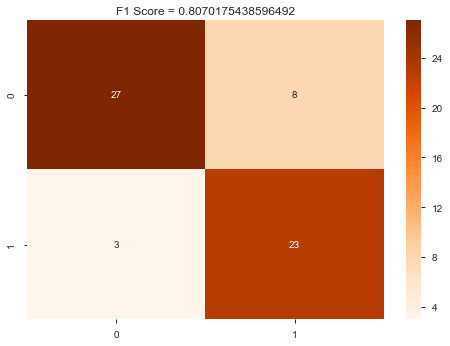

In [126]:
sgd=SGDClassifier(tol=1e-10, random_state=23,loss='log', penalty= "l2", alpha=0.2)
score_sgd=CrossVal(Xtrain,Ytrain,sgd)
print("Accuracy is : ",score_sgd)
sgd.fit(Xtrain,Ytrain)
plotting(Ytest,sgd.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,sgd.predict(Xtest)), annot= True, cmap='Oranges')
sgd_f1=f1_score(Ytest,sgd.predict(Xtest))
plt.title('F1 Score = {}'.format(sgd_f1))

In [141]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score
from sklearn.metrics import matthews_corrcoef


In [143]:
cohen_kappa_score(Ytest,sgd.predict(Xtest))

0.6402144772117963

Accuracy is :  0.8219840063685048


Text(0.5, 1, 'F1 Score = 0.8')

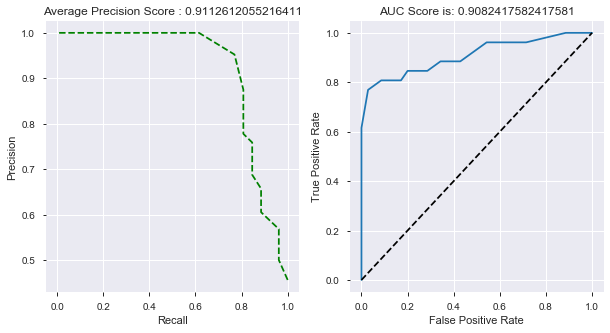

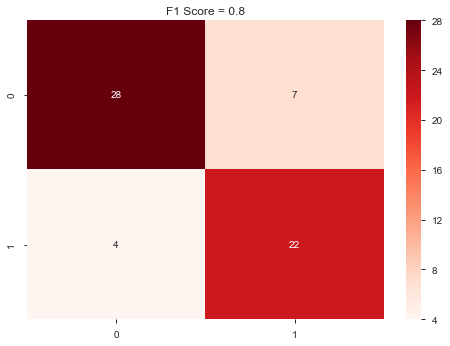

In [127]:
k=KNeighborsClassifier(algorithm='auto',n_neighbors= 19)
score_k=CrossVal(Xtrain,Ytrain,k)
print("Accuracy is : ",score_k)
k.fit(Xtrain,Ytrain)
plotting(Ytest,k.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,k.predict(Xtest)), annot= True, cmap='Reds')
k_f1=f1_score(Ytest,k.predict(Xtest))
plt.title('F1 Score = {}'.format(k_f1))

In [144]:
cohen_kappa_score(Ytest,k.predict(Xtest))

0.6367081754195993

Accuracy is :  0.8514202489506442


C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Text(0.5, 1, 'F1 Score = 0.830188679245283')

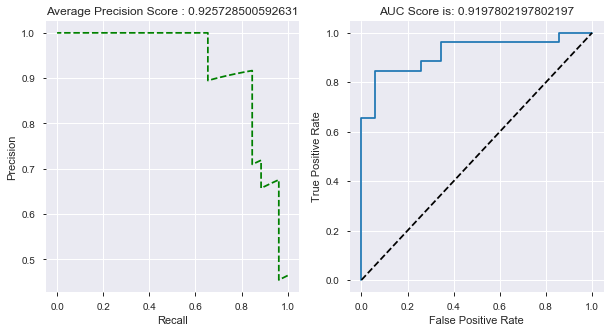

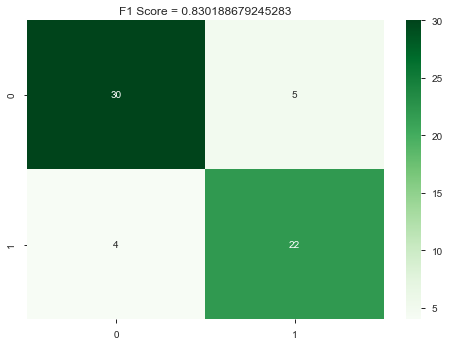

In [128]:
lr=LogisticRegression(class_weight='balanced', tol=1e-10)
score_lr=CrossVal(Xtrain,Ytrain,lr)
print("Accuracy is : ",score_lr)
lr.fit(Xtrain,Ytrain)
plotting(Ytest,lr.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,lr.predict(Xtest)), annot= True, cmap='Greens')
lr_f1=f1_score(Ytest,lr.predict(Xtest))
plt.title('F1 Score = {}'.format(lr_f1))

In [145]:
cohen_kappa_score(Ytest,lr.predict(Xtest))

0.6998359759431383

Accuracy is :  0.7561676798378926


Text(0.5, 1, 'F1 Score = 0.7407407407407408')

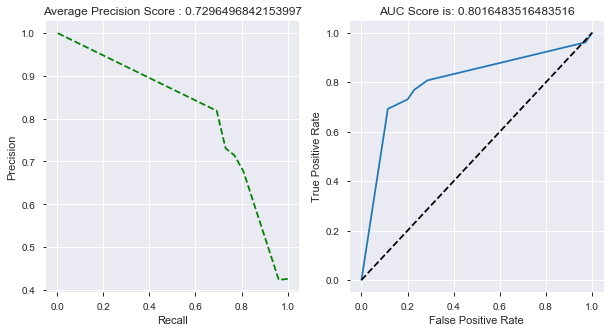

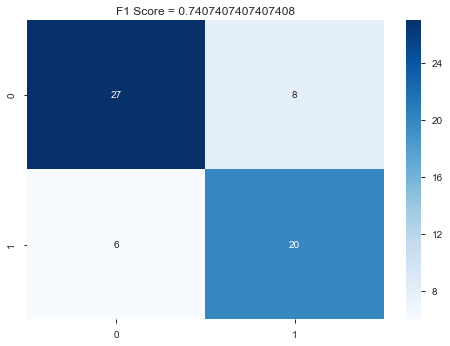

In [129]:
dtc=DecisionTreeClassifier(max_depth=3)
score_dtc=CrossVal(Xtrain,Ytrain,dtc)
print("Accuracy is : ",score_dtc)
dtc.fit(Xtrain,Ytrain)
plotting(Ytest,dtc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,dtc.predict(Xtest)), annot= True, cmap='Blues')

dtc_f1=f1_score(Ytest,dtc.predict(Xtest))
plt.title('F1 Score = {}'.format(dtc_f1))

Accuracy is: 0.8139980460269214


Text(0.5, 1, 'F1 Score = 0.7777777777777779')

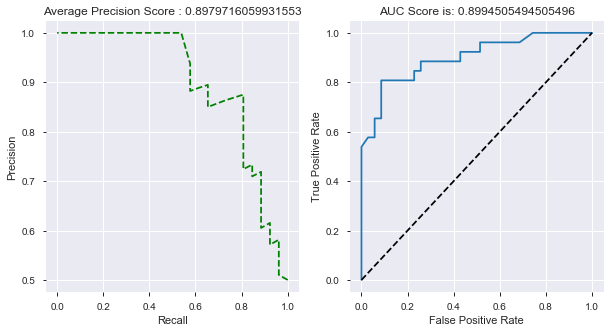

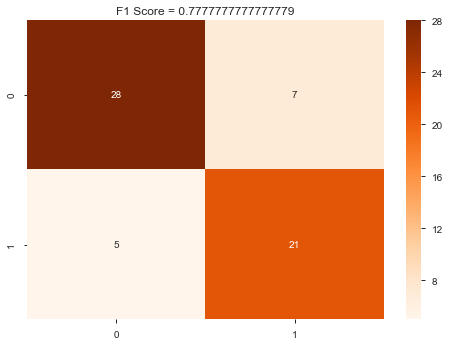

In [130]:
rf=RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=543)
score_rf= CrossVal(Xtrain,Ytrain,rf)
print('Accuracy is:',score_rf)
rf.fit(Xtrain,Ytrain)
plotting(Ytest,rf.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,rf.predict(Xtest)), annot= True, cmap='Oranges')

rf_f1=f1_score(Ytest,rf.predict(Xtest))
plt.title('F1 Score = {}'.format(rf_f1))

In [146]:
cohen_kappa_score(Ytest,rf.predict(Xtest))

0.6017410228509249

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

Accuracy is: 0.5744174265450861


C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\s

Text(0.5, 1, 'F1 Score = 0.5977011494252873')

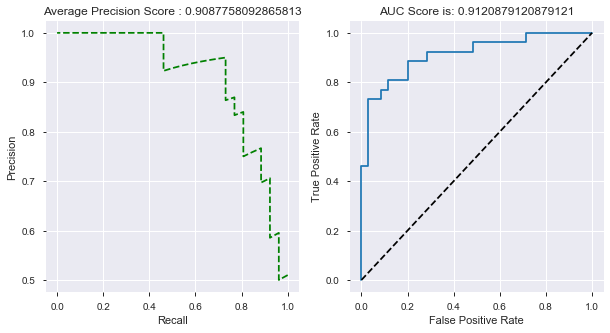

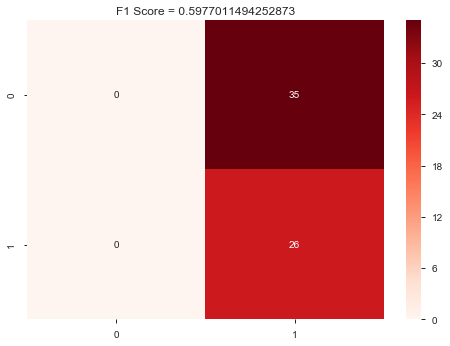

In [131]:
abc=AdaBoostClassifier(sgd,n_estimators=100, random_state=343, learning_rate=0.012)
score_ada= CrossVal(Xtrain,Ytrain,abc)
print('Accuracy is:',score_ada)
abc.fit(Xtrain,Ytrain)
plotting(Ytest,abc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,abc.predict(Xtest)), annot= True, cmap='Reds')

abc_f1=f1_score(Ytest,abc.predict(Xtest))
plt.title('F1 Score = {}'.format(abc_f1))

Accuracy is: 0.7816073237805761


Text(0.5, 1, 'F1 Score = 0.7636363636363636')

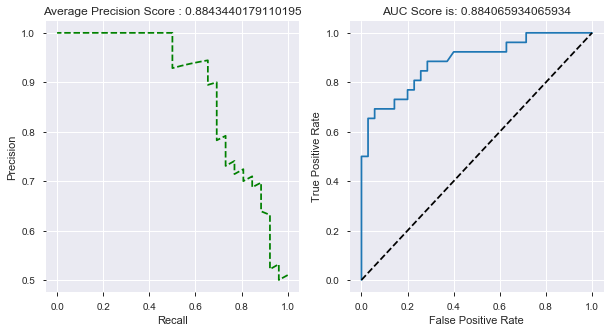

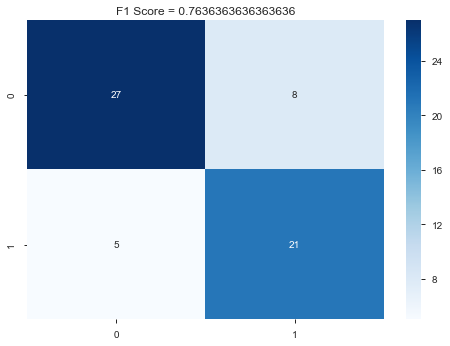

In [132]:
gbc=GradientBoostingClassifier(n_estimators=100, random_state=43, learning_rate = 0.01)
score_gbc= CrossVal(Xtrain,Ytrain,gbc)
print('Accuracy is:',score_gbc)
gbc.fit(Xtrain,Ytrain)
plotting(Ytest,gbc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,gbc.predict(Xtest)), annot= True, cmap='Blues')

gbc_f1=f1_score(Ytest,gbc.predict(Xtest))
plt.title('F1 Score = {}'.format(gbc_f1))

In [147]:
cohen_kappa_score(Ytest,gbc.predict(Xtest))

0.5706551164049811

Accuracy is: 0.7816073237805761


Text(0.5, 1, 'F1 Score = 0.830188679245283')

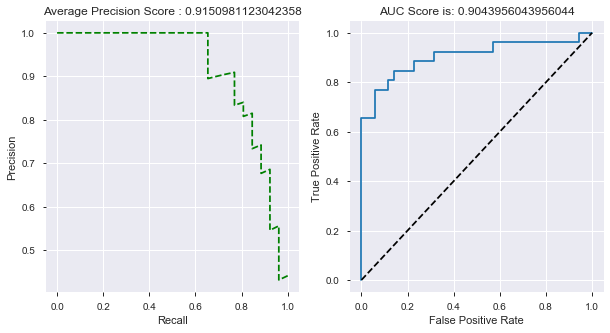

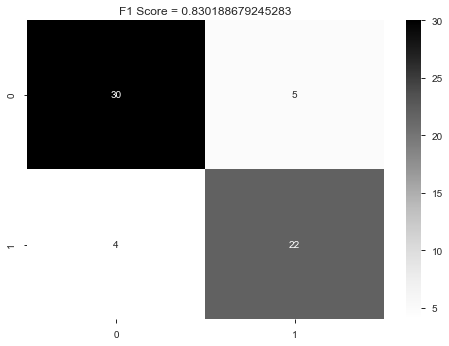

In [133]:
bc=BaggingClassifier(lr,max_samples=23, bootstrap=True, n_jobs= -1)
score_bc= CrossVal(Xtrain,Ytrain,gbc)
print('Accuracy is:',score_bc)
bc.fit(Xtrain,Ytrain)
plotting(Ytest,bc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,bc.predict(Xtest)), annot= True, cmap='Greys')

bc_f1=f1_score(Ytest,bc.predict(Xtest))
plt.title('F1 Score = {}'.format(bc_f1))

Text(0.5, 1.0, 'Feature Importance')

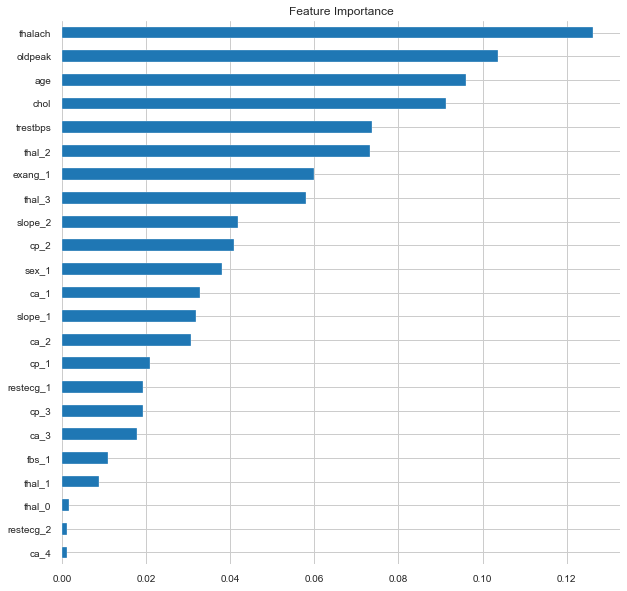

In [134]:
fig= plt.figure(figsize=(10,10))
important=pd.Series(rf.feature_importances_, index=Xtrain.columns)
sns.set_style('whitegrid')
important.sort_values().plot.barh()
plt.title('Feature Importance')

Text(0.5, 1.0, 'Model Accracy')

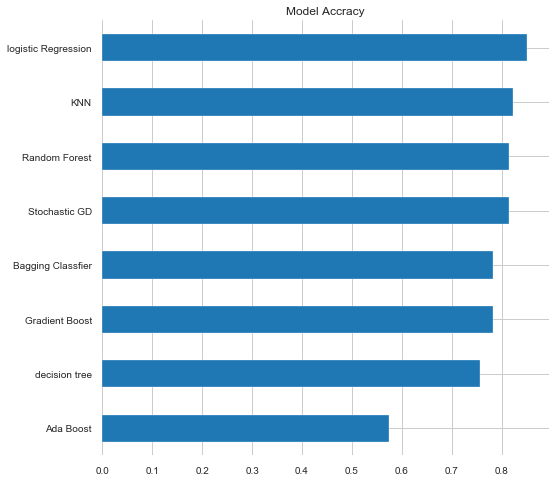

In [148]:
model_accuracy = pd.Series(data=[score_sgd, score_k, score_lr, score_dtc, score_rf, 
                           score_ada, score_gbc, score_bc], 
                           index=['Stochastic GD','KNN','logistic Regression','decision tree', 'Random Forest', 'Ada Boost' , 'Gradient Boost','Bagging Classfier'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy is: 0.8345798957881024


Text(0.5, 1, 'F1 Score = 0.830188679245283')

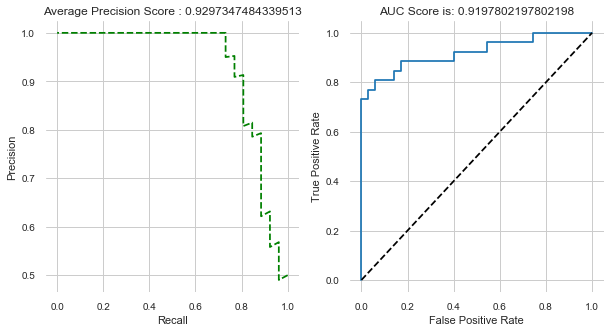

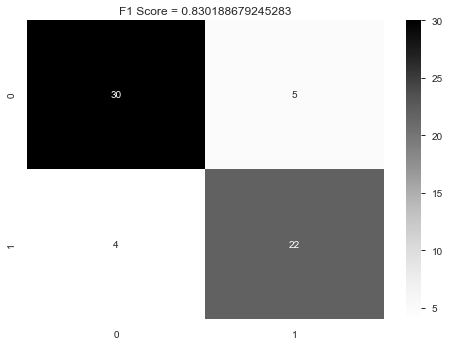

In [139]:
vc=VotingClassifier(estimators=[('knn',k),('gradientboost',gbc),('lr',lr)],
                    voting='soft')
score_vc= CrossVal(Xtrain,Ytrain,vc)
print('Accuracy is:',score_vc)
vc.fit(Xtrain,Ytrain)
plotting(Ytest,vc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,vc.predict(Xtest)), annot= True, cmap='Greys')

vc_f1=f1_score(Ytest,vc.predict(Xtest))
plt.title('F1 Score = {}'.format(vc_f1))

How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. 
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


from the above data modelling we can see that voting classifier gives best result
logistic regression has given higher accuracy

we will rebuild knn and random forest on the basis of overall precision and recall and after selecting only important features 

lets drop few features that are not looking important

In [165]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [161]:
x_new=data_scaled.drop(['target'],axis=1)
y_new=data_scaled['target']

In [162]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x_new,y_new, test_size=0.20,
                                             random_state=10)

In [156]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

Accuracy is :  0.8219840063685048


Text(0.5, 1, 'F1 Score = 0.8')

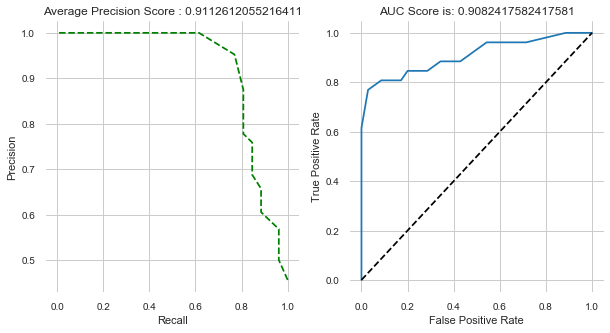

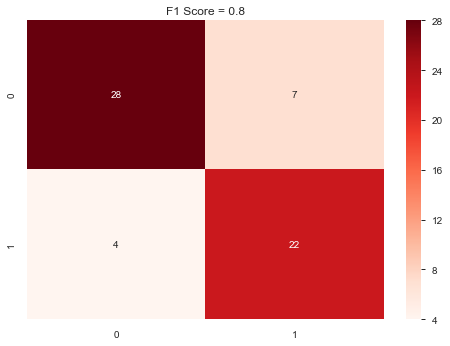

In [157]:
k=KNeighborsClassifier(algorithm='auto',n_neighbors= 19)
score_k=CrossVal(Xtrain,Ytrain,k)
print("Accuracy is : ",score_k)
k.fit(Xtrain,Ytrain)
plotting(Ytest,k.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,k.predict(Xtest)), annot= True, cmap='Reds')
k_f1=f1_score(Ytest,k.predict(Xtest))
plt.title('F1 Score = {}'.format(k_f1))

Accuracy is: 0.8139980460269214


Text(0.5, 1, 'F1 Score = 0.7777777777777779')

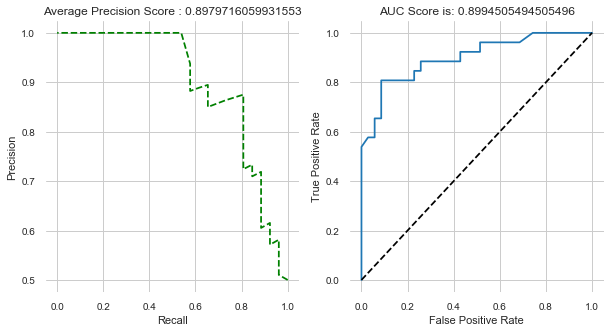

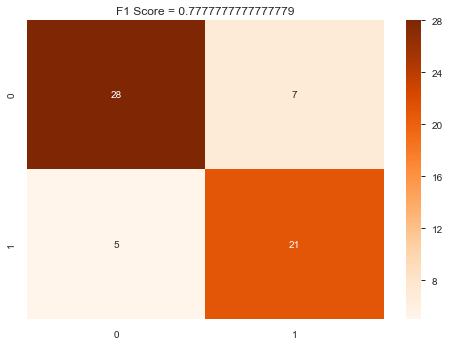

In [158]:
rf=RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=543)
score_rf= CrossVal(Xtrain,Ytrain,rf)
print('Accuracy is:',score_rf)
rf.fit(Xtrain,Ytrain)
plotting(Ytest,rf.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,rf.predict(Xtest)), annot= True, cmap='Oranges')

rf_f1=f1_score(Ytest,rf.predict(Xtest))
plt.title('F1 Score = {}'.format(rf_f1))

In [164]:
x_new.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [167]:
new_df=df.drop(['thal','ca'],axis=1)

In [168]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1


In [172]:
data_new=pd.get_dummies(new_df,drop_first=True)
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1


In [174]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled=MinMaxScaler().fit_transform(data_new)
data_scaled=pd.DataFrame(data=data_scaled, columns=data.columns)

In [175]:
x=data_scaled.drop('target',axis=1)
y=data_scaled['target']

In [176]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size=0.20,
                                             random_state=10)

Accuracy is :  0.7890758431031987


Text(0.5, 1, 'F1 Score = 0.7931034482758621')

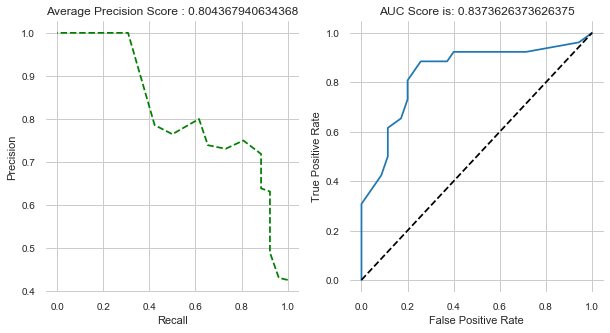

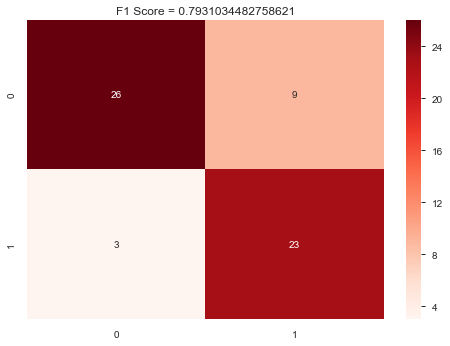

In [177]:
k=KNeighborsClassifier(algorithm='auto',n_neighbors= 19)
score_k=CrossVal(Xtrain,Ytrain,k)
print("Accuracy is : ",score_k)
k.fit(Xtrain,Ytrain)
plotting(Ytest,k.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,k.predict(Xtest)), annot= True, cmap='Reds')
k_f1=f1_score(Ytest,k.predict(Xtest))
plt.title('F1 Score = {}'.format(k_f1))

Accuracy is: 0.8225050658561297


Text(0.5, 1, 'F1 Score = 0.7457627118644068')

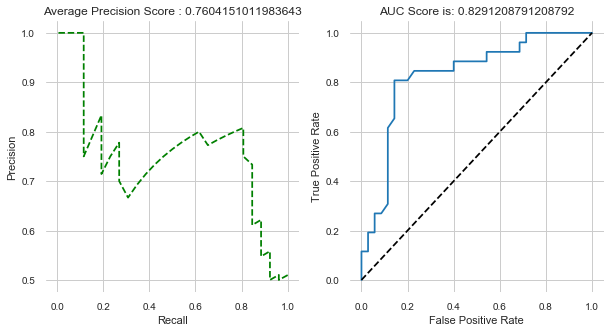

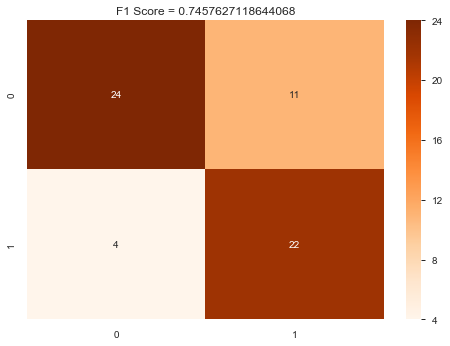

In [178]:
rf=RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=543)
score_rf= CrossVal(Xtrain,Ytrain,rf)
print('Accuracy is:',score_rf)
rf.fit(Xtrain,Ytrain)
plotting(Ytest,rf.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,rf.predict(Xtest)), annot= True, cmap='Oranges')

rf_f1=f1_score(Ytest,rf.predict(Xtest))
plt.title('F1 Score = {}'.format(rf_f1))

In [181]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()  
pred_gbm=gbm.fit(Xtrain,Ytrain).predict(Xtest)
accuracy_score(Ytest,pred_gbm) 

0.7868852459016393

In [183]:
cohen_kappa_score(Ytest,pred_gbm)

0.574798927613941

In [185]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
pred_gnb=gnb.fit(Xtrain,Ytrain).predict(Xtest) 

In [187]:
accuracy_score(Ytest,pred_gnb)

0.8360655737704918

Accuracy is :  0.7808203068461428


C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sanas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Text(0.5, 1, 'F1 Score = 0.7547169811320754')

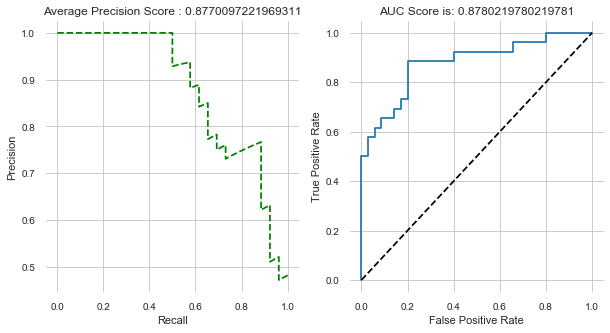

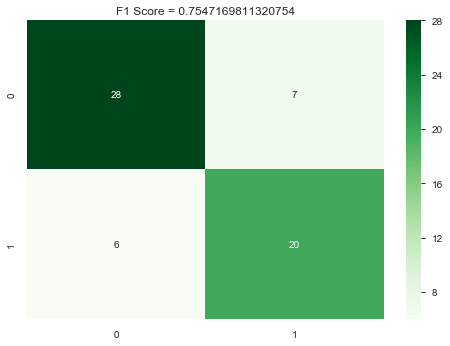

In [197]:
lr=LogisticRegression(class_weight='balanced', tol=1e-10)
score_lr=CrossVal(Xtrain,Ytrain,lr)
print("Accuracy is : ",score_lr)
lr.fit(Xtrain,Ytrain)
plotting(Ytest,lr.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,lr.predict(Xtest)), annot= True, cmap='Greens')
lr_f1=f1_score(Ytest,lr.predict(Xtest))
plt.title('F1 Score = {}'.format(lr_f1))

summary:

1.i tried dropping columns that was not showing important as per random forest feature important
2.after dropping columns i built naive base model that gave me highest accuracy....leme remove cohens cappa score and finalise

In [188]:
cohen_kappa_score(Ytest,pred_gnb)

0.6713362068965517

highest cohen _kappa score is in naive bayes after refitting model ......ie i dropped features that was with lowest importance

however logistic regression is more accurate model based on precision and true positive prediction ratio

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model
2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
3.	What changes from the base model had the most effect on model performance?
4.	What are the key risks to your results and interpretation?

Text(0.5, 1, 'F1 Score = 0.8214285714285715')

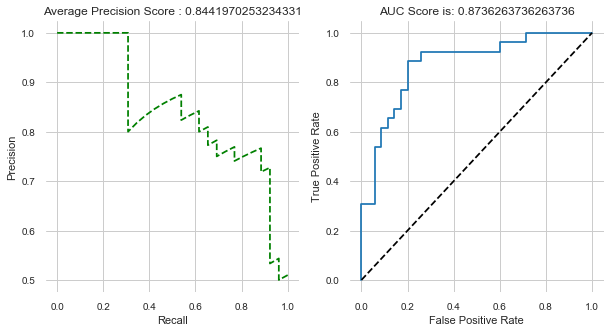

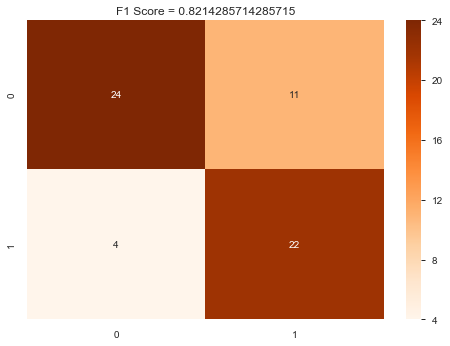

In [191]:

plotting(Ytest,gnb.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,rf.predict(Xtest)), annot= True, cmap='Oranges')

rf_f1=f1_score(Ytest,gnb.predict(Xtest))
plt.title('F1 Score = {}'.format(rf_f1))

above is the summary of naive base model
the precision score is quite good of the model
the accuracy improved after droping two columns that were not showing importance
only two columns were choosen so that loss of information should not happen


however ,best model as per precision and recall looks logistic regression with higher accuracy as well

as in classsification model we dont only look at accuracy score but also how precise is the model ie.precision score

also,one can conclude that prediction of heart disease can take place on the basis of features or information present in the form of maximum heart rate achieved,age of casualty,slope of peak excercise,old peak ie depression induced by excercise relative to rest,cholestrol level,and blood pressure while resting

overall we can say that people who have poor lifestyle and eating habits are more prone to heart diseases

females are more prone to heart disease .also,bp patients are more riskful towards heart disease